In [1]:
from langgraph_supervisor import create_supervisor
from langchain.agents import create_agent
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI

In [2]:
from dotenv import load_dotenv
import os
load_dotenv() 
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
GEMINI_API_KEY=os.getenv("GEMINI_API_KEY")
openai_api_key=os.getenv("OPENAI_API_KEY")

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
if GEMINI_API_KEY is None:
    raise ValueError("Please set GOOGLE_API_KEY in your environment")
 
model = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    google_api_key=GEMINI_API_KEY
)

/home/logicrays/Desktop/RAGHAV/AgentSphere-AI/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#model=  ChatGroq(api_key=GROQ_API_KEY, model_name="llama-3.3-70b-versatile")
#model=  ChatOpenAI(model_name="gpt-4o-mini", openai_api_key=openai_api_key)

# duckduckgo search tool

In [5]:
from langchain_community.tools import DuckDuckGoSearchRun

def search_duckduckgo(query: str):
    """Searches DuckDuckGo using LangChain's DuckDuckGoSearchRun tool."""
    search = DuckDuckGoSearchRun()
    return search.invoke(query)



# calculator tool

In [6]:

def calculate_expression(expression: str) -> str:
    """Calculate a mathematical expression."""
    try:
        result = eval(expression, {"__builtins__": {}}, {})
        return str("hellondmbdbdjsakb")
    except Exception as e:
        return f"Error: {str(e)}"

In [7]:
# create agents using the Tool objects defined earlier

math_agent = create_agent(
    model=model,
    tools=[calculate_expression],
    name="math_expert",
    system_prompt="You are a math expert. Always use one tool at a time."
)


In [8]:
research_agent = create_agent(
    model=model,
    tools=[search_duckduckgo],
    name="research_expert",
    system_prompt="You are a world class researcher with access to web search. Do not do any math."
)

In [9]:
from langchain_core.language_models.chat_models import BaseChatModel

class ToolFriendlyModel(BaseChatModel):
    def __init__(self, model):
        self.model = model

    def invoke(self, input, **kwargs):
        return self.model.invoke(input)

    # Supervisor will call this — so we must allow it
    def bind_tools(self, tools, **kwargs):
        return self

    @property
    def lc_serializable(self):
        return False



In [10]:
supervisor_model = ToolFriendlyModel(model)


TypeError: Can't instantiate abstract class ToolFriendlyModel without an implementation for abstract methods '_generate', '_llm_type'

In [ ]:
workflow = create_supervisor(
    agents=[research_agent, math_agent],
    model=supervisor_model,
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For web search queries, always use research_agent. "
        "For math problems, always use math_agent. "
        "For general questions, answer directly. "
    )
)


In [ ]:
workflow = create_supervisor(
    agents=[research_agent, math_agent],
    model=supervisor_model,  # <-- FIXED
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For web search queries, always use research_agent. "
        "For math problems, always use math_agent. "
        "For normal questions, answer directly as supervisor. "
        "If a tool is used, return the final answer as supervisor."
    )
)


AttributeError: 'RunnableLambda' object has no attribute 'bind_tools'

In [ ]:
app=workflow.compile()

NameError: name 'workflow' is not defined

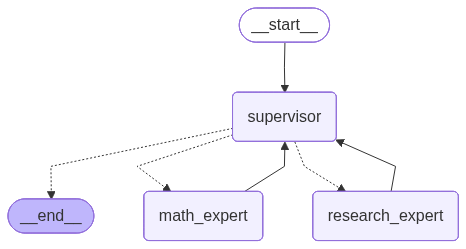

In [ ]:
app

In [ ]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what is the value of the 35*65-20"
        }
    ]
})


In [ ]:
for m in result["messages"]:
    m.pretty_print()


================================ Human Message =================================

what is the value of the 35*65-20
================================== Ai Message ==================================
Name: supervisor

To evaluate this expression, we need to follow the order of operations (PEMDAS):

1. Multiply 35 and 65: 35 * 65 = 2275
2. Subtract 20 from the result: 2275 - 20 = 2255

So the final result is 2255.


In [ ]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what is the value of  50*2*3"
        }
    ]
})

for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is the value of  50*2*3
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_math_expert (zvb11gv1g)
 Call ID: zvb11gv1g
  Args:
================================= Tool Message =================================
Name: transfer_to_math_expert

Successfully transferred to math_expert
================================== Ai Message ==================================

The result of the calculation is 300.
================================== Ai Message ==================================
Name: math_expert

Transferring back to supervisor
Tool Calls:
  transfer_back_to_supervisor (8438455a-3e6f-402e-b1af-ec1a9fde3b8b)
 Call ID: 8438455a-3e6f-402e-b1af-ec1a9fde3b8b
  Args:
================================= Tool Message =================================
Name: transfer_back_to_supervisor

Successfully transferred back to supervisor
=============

In [ ]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what is the value of  50*2*3 and what is the langgraph"
        }
    ]
})

for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is the value of  50*2*3 and what is the langgraph
================================== Ai Message ==================================
Name: supervisor

To calculate the value of 50*2*3, I need to call the math expert.
Tool Calls:
  transfer_to_math_expert (09tt3fh90)
 Call ID: 09tt3fh90
  Args:
================================= Tool Message =================================
Name: transfer_to_math_expert

Successfully transferred to math_expert
================================== Ai Message ==================================

The value of the expression 50*2*3 is 300. 

As for the term "langgraph," it could refer to a graph or visual representation related to language, but without more context, it's difficult to provide a specific explanation. If you have more details or a particular aspect of "langgraph" you're interested in, I'd be happy to try and help further.
================================== Ai Mes

In [ ]:
!pip install langchain_google_genai

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# requirements:
# pip install langchain-google-genai langgraph langchain

import os
from dotenv import load_dotenv
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage
from langchain.tools import tool
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages

load_dotenv()

# set API key (or ensure GOOGLE_API_KEY is set in env)
google_api_key = os.getenv("GOOGLE_API_KEY")
if google_api_key is None:
    raise ValueError("Please set environment variable GOOGLE_API_KEY")

# 1. Initialize the Gemini LLM model
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",  # choose appropriate model
    temperature=0,
    google_api_key=google_api_key,
)

# Example tool: simple helper for demonstration
@tool(description="Solve a basic math expression.")
def solve_math_problem(expression: str) -> str:
    try:
        result = eval(expression, {"__builtins__": {}})
        return f"The answer is {result}."
    except Exception as e:
        return f"Error: {str(e)}"

tools = [solve_math_problem]

# 2. Create a model bound with tools (so the agent can use them)
model_with_tools = llm.bind_tools(tools)

# 3. Define the State
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    number_of_steps: int

# 4. Define nodes (as functions) for the graph
def call_model(state: AgentState) -> dict:
    # invoke LLM with the current messages
    response: AIMessage = model_with_tools.invoke(state["messages"])
    return {"messages": [response], "number_of_steps": state["number_of_steps"] + 1}

def call_tool(state: AgentState) -> dict:
    outputs = []
    last_msg = state["messages"][-1]
    if hasattr(last_msg, "tool_calls"):
        for tool_call in last_msg.tool_calls:
            tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])
            outputs.append(tool_result)
    # convert the plain results to messages
    tool_msgs = [HumanMessage(content=str(o)) for o in outputs]
    return {"messages": tool_msgs}

def should_continue(state: AgentState) -> str:
    last = state["messages"][-1]
    if hasattr(last, "tool_calls") and last.tool_calls:
        return "tools"
    return "end"

# map tool names
tools_by_name = {tool.name: tool for tool in tools}

# 5. Build StateGraph
workflow = StateGraph(AgentState)
workflow.add_node("llm", call_model)
workflow.add_node("tools", call_tool)
workflow.set_entry_point("llm")

workflow.add_conditional_edges(
    "llm",
    should_continue,
    {
        "tools": "tools",
        "end": END,
    }
)
workflow.add_edge("tools", "llm")

# 6. Compile the workflow into an “app”
app = workflow.compile()

# 7. Run the app (invoke)
initial_state = {
    "messages": [HumanMessage(content="What is (12 + 8) * 3?")],
    "number_of_steps": 0,
}

result = app.invoke(initial_state)
print("Final result:", result["messages"][-1].content)
print("Number of steps:", result["number_of_steps"])


ModuleNotFoundError: No module named 'langchain_google_genai'

In [11]:
# Imports
import functools
from typing import TypedDict, Sequence, Annotated
import operator

from langchain_core.messages import HumanMessage, AIMessage
from langchain_core.prompts import (
    PromptTemplate,
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    MessagesPlaceholder
)
from langchain_core.output_parsers import JsonOutputParser
from langchain.agents import AgentExecutor, create_tool_calling_agent
from langchain.tools import tool
from langchain_core.runnables import RunnableLambda

# 1. Initialize your base LLM (for example, using OpenAI or another provider)
#    Replace this with your model instance that you are using
llm = SomeChatModel(...)

# 2. Define your toolkits

# Math toolkit
@tool
def add(a: int, b: int) -> int:
    """Add two numbers."""
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

@tool
def square(a: int) -> int:
    """Calculate the square of a number."""
    a = int(a)
    return a * a

math_toolkit = [add, multiply, square]

# Web / research toolkit (you might wrap search engine functions)
@tool
def web_search(query: str) -> str:
    """Perform a web search and return summary results."""
    # implement your search logic here
    return perform_search_and_return_summary(query)

research_toolkit = [web_search]

# 3. Create helper to build tool-calling agents
def create_tool_agent(llm, tools: list, system_prompt: str, name: str):
    system_prompt_template = PromptTemplate(
        template=system_prompt + """
            ONLY respond to the part of query relevant to your purpose.
            IGNORE tasks you can't complete.
            Use the following context to answer your query if available:
            {agent_history}
        """,
        input_variables=["agent_history"]
    )
    system_message = SystemMessagePromptTemplate(prompt=system_prompt_template)
    prompt = ChatPromptTemplate.from_messages([
        system_message,
        MessagesPlaceholder(variable_name="messages"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ])

    agent = create_tool_calling_agent(llm, tools, prompt)
    executor = AgentExecutor(agent=agent, tools=tools,
                             return_intermediate_steps=True, verbose=False, name=name)
    return executor

# 4. Build the agents
math_agent = create_tool_agent(
    llm=llm,
    tools=math_toolkit,
    system_prompt="You are a math specialist. Use your tools to solve math problems.",
    name="MathAgent"
)

research_agent = create_tool_agent(
    llm=llm,
    tools=research_toolkit,
    system_prompt="You are a research specialist. Use your tools to fetch real-time or web data.",
    name="ResearchAgent"
)

# 5. Build a “communicator” agent to format final results for the user
system_prompt_template = PromptTemplate(
    template = """You are a helpful assistant summarizing results from agents.
    Here is the agent history:
    {agent_history}
    Provide the final coherent answer to the user.
    """,
    input_variables=["agent_history"]
)
system_message = SystemMessagePromptTemplate(prompt=system_prompt_template)
prompt_comm = ChatPromptTemplate.from_messages([
    system_message,
    MessagesPlaceholder(variable_name="messages"),
])
comm_agent = llm.chain(prompt_comm)  # adapt depending on your library

# 6. Build the supervisor agent
members = ["MathAgent", "ResearchAgent", "Communicate"]
member_options = {member: member for member in members}
from enum import Enum
MemberEnum = Enum('MemberEnum', member_options)

class SupervisorOutput(TypedDict):
    next: MemberEnum

supervisor_parser = JsonOutputParser(pydantic_object=SupervisorOutput)

system_prompt = (
    "You are a supervisor agent managing a team: {members}.\n"
    "Given the user request and crew history, decide which worker should act next.\n"
    "Each worker will perform a task and respond with their results and status.\n"
    "When finished, route to Communicate to deliver result to user.\n"
    "Select one of: {options}\n"
    "{format_instructions}"
)
prompt_supervisor = ChatPromptTemplate.from_messages([
    ("system", system_prompt)
]).partial(
    options=", ".join(members),
    members=", ".join(members),
    format_instructions=supervisor_parser.get_format_instructions()
)

supervisor_chain = prompt_supervisor | llm | supervisor_parser

# 7. Define nodes for the graph
def tool_agent_node(state, crew_member: AgentExecutor, name: str):
    input_data = {
        "messages": [state['messages'][-1]],
        "agent_history": state['agent_history']
    }
    result = crew_member.invoke(input_data)
    # update history
    return {
        "agent_history": state['agent_history'] + [AIMessage(content=result["output"], additional_kwargs={"intermediate_steps": result["intermediate_steps"]}, name=name)]
    }

def communicate_node(state):
    input_data = {
        "messages": [state['messages'][-1]],
        "agent_history": state['agent_history']
    }
    result = comm_agent.invoke(input_data)
    return {
        "messages": [result]
    }

# 8. Define the state schema
class AgentState(TypedDict):
    messages: Annotated[Sequence[HumanMessage | AIMessage], operator.add]
    next: str
    agent_history: Annotated[Sequence[HumanMessage | AIMessage], operator.add]

# 9. Build the StateGraph
from langchain_core.runnables import StateGraph, END

workflow = StateGraph(AgentState)
workflow.add_node("MathAgent", functools.partial(tool_agent_node, crew_member=math_agent, name="MathAgent"))
workflow.add_node("ResearchAgent", functools.partial(tool_agent_node, crew_member=research_agent, name="ResearchAgent"))
workflow.add_node("Communicate", communicate_node)
workflow.add_node("Supervisor", supervisor_chain)

workflow.set_entry_point("Supervisor")

# Edges
workflow.add_edge("MathAgent", "Supervisor")
workflow.add_edge("ResearchAgent", "Supervisor")
workflow.add_edge("Communicate", END)
workflow.add_conditional_edges("Supervisor", lambda state: state["next"], member_options)

graph = workflow.compile()

# 10. Run the workflow
initial_state = {
    "messages": [HumanMessage(content="What is 137×89? Meanwhile also find me current gold price in India.")],
    "agent_history": [],
    "next": None
}

for state in graph.stream(initial_state):
    if "__end__" not in state:
        print(state)
        print("----")


ImportError: cannot import name 'AgentExecutor' from 'langchain.agents' (/home/logicrays/Desktop/RAGHAV/AgentSphere-AI/.venv/lib/python3.13/site-packages/langchain/agents/__init__.py)

In [13]:
!pip show langchain


Name: langchain
Version: 0.3.27
Summary: Building applications with LLMs through composability
Home-page: 
Author: 
Author-email: 
License: MIT
Location: /home/logicrays/.local/lib/python3.10/site-packages
Requires: async-timeout, langchain-core, langchain-text-splitters, langsmith, pydantic, PyYAML, requests, SQLAlchemy
Required-by: langchain-community
